<a href="https://colab.research.google.com/github/anastefan176/ULEZ/blob/main/Distribution_of_NO2_concentrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

pylab.rcParams['figure.figsize'] = (10., 8.)

In [ ]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('LaqnData (2).csv')
data.head()

Saving LaqnData (2).csv to LaqnData (2) (7).csv


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HR1,NO2,01/01/2020 00:00,33.6,ug m-3,R
1,HR1,NO2,02/01/2020 00:00,15.9,ug m-3,R
2,HR1,NO2,03/01/2020 00:00,13.2,ug m-3,R
3,HR1,NO2,04/01/2020 00:00,19.7,ug m-3,R
4,HR1,NO2,05/01/2020 00:00,14.1,ug m-3,R


In [ ]:
data = pd.read_csv('LaqnData (2).csv')
data.columns = ["site", "pollutant", "datetime", "Value", "Units", "status"]

data["datetime"] = pd.to_datetime(data["datetime"], dayfirst=True, errors="coerce")

data = data.dropna(subset=["datetime", "Value"])

data = data[data["status"] == "R"]

data["Value"] = pd.to_numeric(data["Value"], errors="coerce")

data = data[(data["Value"] >= 0) & (data["Value"] <= 200)]

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6330 entries, 0 to 10961
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   site       6330 non-null   object        
 1   pollutant  6330 non-null   object        
 2   datetime   6330 non-null   datetime64[ns]
 3   Value      6330 non-null   float64       
 4   Units      6330 non-null   object        
 5   status     6330 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 346.2+ KB
None


,site,pollutant,datetime,Value,Units,status
0,HR1,NO2,2020-01-01,33.6,ug m-3,R
1,HR1,NO2,2020-01-02,15.9,ug m-3,R
2,HR1,NO2,2020-01-03,13.2,ug m-3,R
3,HR1,NO2,2020-01-04,19.7,ug m-3,R
4,HR1,NO2,2020-01-05,14.1,ug m-3,R


In [ ]:
from google.colab import files
uploaded = files.upload()

data2 = pd.read_csv('LaqnData (3).csv')
data.head()

Saving LaqnData (3).csv to LaqnData (3) (2).csv


,site,pollutant,datetime,Value,Units,status
0,HR1,NO2,2020-01-01,33.6,ug m-3,R
1,HR1,NO2,2020-01-02,15.9,ug m-3,R
2,HR1,NO2,2020-01-03,13.2,ug m-3,R
3,HR1,NO2,2020-01-04,19.7,ug m-3,R
4,HR1,NO2,2020-01-05,14.1,ug m-3,R


In [ ]:
data2 = pd.read_csv('LaqnData (3).csv')



data2.columns = ["site", "pollutant", "datetime", "Value", "Units", "status"]
data2["datetime"] = pd.to_datetime(data2["datetime"], dayfirst=True, errors="coerce")
data2 = data2.dropna(subset=["datetime", "Value"])
data2 = data2[data2["status"] == "R"]
data2["Value"] = pd.to_numeric(data2["Value"], errors="coerce")
data2 = data2[(data2["Value"] >= 0) & (data2["Value"] <= 200)]

print("Second file (data2) after cleaning:")
print(data2.info())
data2.head()


Second file (data2) after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 6646 entries, 0 to 9864
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   site       6646 non-null   object        
 1   pollutant  6646 non-null   object        
 2   datetime   6646 non-null   datetime64[ns]
 3   Value      6646 non-null   float64       
 4   Units      6646 non-null   object        
 5   status     6646 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 363.5+ KB
None


,site,pollutant,datetime,Value,Units,status
0,MY1,NO2,2020-01-01,51.3,ug m-3,R
1,MY1,NO2,2020-01-02,51.5,ug m-3,R
2,MY1,NO2,2020-01-03,43.1,ug m-3,R
3,MY1,NO2,2020-01-04,60.5,ug m-3,R
4,MY1,NO2,2020-01-05,57.1,ug m-3,R


In [ ]:
combined = pd.concat([data, data2], ignore_index=True)


In [ ]:
combined.shape
combined.head()


,site,pollutant,datetime,Value,Units,status
0,HR1,NO2,2020-01-01,33.6,ug m-3,R
1,HR1,NO2,2020-01-02,15.9,ug m-3,R
2,HR1,NO2,2020-01-03,13.2,ug m-3,R
3,HR1,NO2,2020-01-04,19.7,ug m-3,R
4,HR1,NO2,2020-01-05,14.1,ug m-3,R


In [ ]:
combined["site"].unique()


array(['HR1', 'HV1', 'ST4', 'LB4', 'MY1', 'BG2', 'BL0', 'TH2', 'BX1'],
      dtype=object)

In [ ]:
print("data sites:", data["site"].unique())
print("data2 sites:", data2["site"].unique())

data sites: ['HR1' 'HV1' 'ST4' 'LB4']
data2 sites: ['MY1' 'BG2' 'BL0' 'TH2' 'BX1']


In [ ]:
ulez_map = {
    "LB4": "Inside ULEZ",
    "BL0": "Inside ULEZ",
    "MY1": "Inside ULEZ",
    "TH2": "Inside ULEZ",
    "BX1": "Inside ULEZ",

    "ST4": "Outside ULEZ",
    "HR1": "Outside ULEZ",
    "HV1": "Outside ULEZ",
    "BG2": "Outside ULEZ",

}
combined["zone"] = combined["site"].map(ulez_map)

In [ ]:
combined[["site", "zone"]].drop_duplicates()



,site,zone
0,HR1,Outside ULEZ
1168,HV1,Outside ULEZ
2980,ST4,Outside ULEZ
4526,LB4,Inside ULEZ
6330,MY1,Inside ULEZ
7727,BG2,Outside ULEZ
9450,BL0,Inside ULEZ
10487,TH2,Inside ULEZ
12278,BX1,Inside ULEZ


In [ ]:
combined["zone"].value_counts()
combined.groupby("zone")["Value"].mean()


,Value
zone,
Inside ULEZ,36.769050
Outside ULEZ,25.003153


In [ ]:
inside = combined[combined["zone"] == "Inside ULEZ"]["Value"]
outside = combined[combined["zone"] == "Outside ULEZ"]["Value"]


In [ ]:
inside.mean(), outside.mean()


(np.float64(36.76905009959863), np.float64(25.003152504400706))

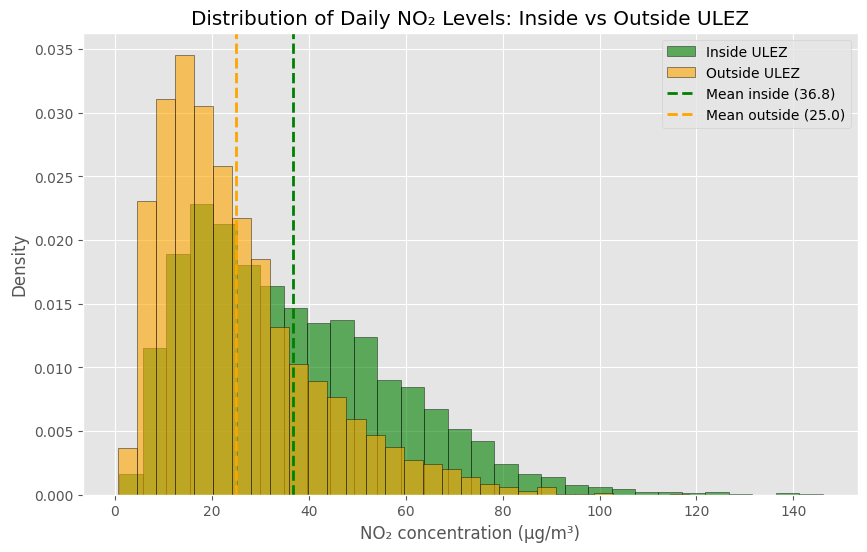

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(inside, bins=30, alpha=0.6, color='green', label='Inside ULEZ', edgecolor='black', density=True)
plt.hist(outside, bins=30, alpha=0.6, color='orange', label='Outside ULEZ', edgecolor='black', density=True)

plt.axvline(inside.mean(), color='green', linestyle='dashed', linewidth=2, label=f"Mean inside ({inside.mean():.1f})")
plt.axvline(outside.mean(), color='orange', linestyle='dashed', linewidth=2, label=f"Mean outside ({outside.mean():.1f})")

plt.xlabel("NO₂ concentration (µg/m³)")
plt.ylabel("Density")
plt.title("Distribution of Daily NO₂ Levels: Inside vs Outside ULEZ")
plt.legend()
plt.show()


In [ ]:
import numpy as np
from scipy.stats import norm

def two_hist(groups, group_labs, xlab, title):
    plt.figure(figsize=(15,6))
    it = -1

    for var in groups:
        it += 1
        sample_size = 1000
        iterations = 10000
        sample_means = []


        for i in range(iterations):
            sample = var.sample(sample_size, replace=True)
            sample_mean = sample.mean()
            sample_means.append(sample_mean)


        mu, se = norm.fit(sample_means)
        xmin, xmax = plt.xlim()
        x = np.linspace(min(sample_means), max(sample_means), 100)
        p = norm.pdf(x, mu, se)


        plt.hist(sample_means, bins=30, density=True, alpha=0.5,
                 edgecolor='white', label=group_labs[it])
        plt.plot(x, p, 'k', linewidth=2)
        plt.axvline(mu, color='green', linestyle='solid', linewidth=3)
        plt.axvline(mu-2*se, color='blue', linestyle='dashed', linewidth=1.5, label='μ - 2σ' if it==0 else "")
        plt.axvline(mu+2*se, color='black', linestyle='dashed', linewidth=1.5, label='μ + 2σ' if it==0 else "")

    plt.title(title)
    plt.xlabel(xlab)
    plt.legend()
    plt.show()


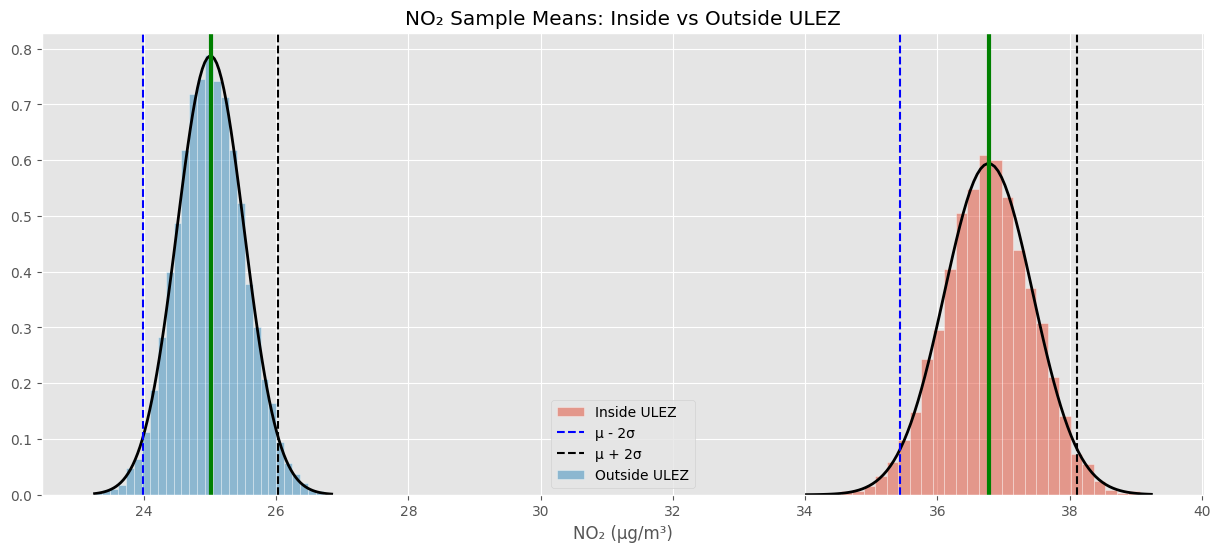

In [ ]:
two_hist([inside, outside], ['Inside ULEZ', 'Outside ULEZ'],
         'NO₂ (µg/m³)', 'NO₂ Sample Means: Inside vs Outside ULEZ')
